In [1]:
import sys
import time
import pickle
import gzip
from random import randint
from scipy import misc
import scipy.ndimage
from scipy.sparse import csc_matrix, issparse
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans,MiniBatchKMeans
import matplotlib.pyplot as plt
import json
import csv
import collections
import math
import sys

#setting path
DATA_PATH = 'data/mnist/'

IMAGES_TRAIN = 'data_training'
IMAGES_TEST = 'data_testing'

RANDOM_SEED = 42
N_CLASSES = 10
N_FEATURES = 28 * 28

#import data+label
data_training = DATA_PATH+IMAGES_TRAIN
data_testing = DATA_PATH+IMAGES_TEST
ft = gzip.open(data_training, 'rb')
TRAINING = pickle.load(ft)
ft.close()
ft = gzip.open(data_testing, 'rb')
TESTING = pickle.load(ft)
ft.close()

In [26]:
train_raw = ((
          [1,1,1,
           1,0,0,
           1,1,1,],
          [1,1,1,
           1,0,1,
           1,0,1,],
          [1,1,1,
           0,0,1,
           1,1,1,],
          [1,1,1,
           0,1,0,
           0,1,0,],
          [0,0,1,
           1,1,1,
           0,0,1,],
          [0,1,0,
           0,1,0,
           1,1,1,],), (1, 1, 1, 0, 0, 0))

test_raw = ((
          [1,0,1,
           1,0,1,
           1,1,1,],
          [1,0,0,
           1,1,1,
           1,0,0,],), (1, 0))


In [27]:
import numpy as np
x_train = [np.array(t) for t in train_raw[0]]
t_train = np.array(train_raw[1])

x_test = [np.array(t) for t in test_raw[0]]
t_test = np.array(test_raw[1])

In [28]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def predict(w, x):
    return sigmoid(np.dot(w, x))

In [29]:
def update(w, x, t):
    y = predict(w, x)
    delta = y * (1-y) * (y-t) * x
    return -0.01*delta

In [30]:
def error(w, xs, ts):
    predictions = list(map(lambda x: 1 if x > 0.5 else 0, np.dot(xs, w)))
    errors = np.abs(predictions-ts)
    return sum(errors)

In [35]:
w = np.zeros(len(x_train[0]))

In [36]:
error(w, x_train, t_train)

3

In [37]:
n = len(x_train)

for t in range(500):
    for i in range(n):
        w += update(w, x_train[i], t_train[i])
    if t%100 == 0:
        print('t={}, err={}'.format(t, error(w, x_train, t_train)))
    

t=0, err=3
t=100, err=0
t=200, err=0
t=300, err=0
t=400, err=0


In [34]:
error(w, x_test, t_test)

0

In [39]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def update(w, x_batch, t_batch):
    y = sigmoid(np.dot(x_batch, w))
    delta = np.dot(np.array(x_batch).T, (y * (1-y) * (y-t_batch)))
    return -0.01*delta

w = np.zeros(len(x_train[0]))
for t in range(500):
    w += update(w, x_train, t_train)
    if t%50 == 0:
        print('t={}, err={}'.format(t, error(w, x_train, t_train)))

t=0, err=3
t=50, err=3
t=100, err=0
t=150, err=0
t=200, err=0
t=250, err=0
t=300, err=0
t=350, err=0
t=400, err=0
t=450, err=0


In [40]:
error(w, x_test, t_test)

0

In [50]:
X = np.array(train_raw[0])
t = np.array(train_raw[1])

X_test = np.array(test_raw[0])
t_test = np.array(test_raw[1])

In [60]:
w = np.zeros((len(x_train[0]), 1))

In [53]:
def predict(w, X):
    return sigmoid(np.dot(X, w))

In [54]:
def update(w, X, t):
    y = predict(w, X)
    delta = np.dot(X.T, y * (1-y) * (y-t.reshape(-1, 1)))
    return -0.01*delta

In [58]:
def error(w, X, t):
    predictions = np.array(list(map(lambda x: 1 if x > 0.5
                                    else 0, predict(w, X))))
    errors = np.abs(predictions-t)
    return sum(errors)

In [61]:
num_epochs = 500
train_errors = []
test_errors = []

for e in range(num_epochs):
    w += update(w, X, t)
    if e%100 == 0:
        print('t={}, err={}'.format(e, error(w, X, t)))
    train_errors.append(error(w, X, t))
    test_errors.append(error(w, X_test, t_test))

t=0, err=3
t=100, err=0
t=200, err=0
t=300, err=0
t=400, err=0


In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
def predict(w, X):
    return sigmoid(np.dot(X, w))

In [15]:
def update(w, X, t):
    y = predict(w, X)
    delta = np.dot(X.T, y * (1-y) * (y.reshape(-1,1)-t.reshape(-1, 1)))
    return -0.00005*delta

In [16]:
def error(w, X, t):
    predictions = np.array(list(map(lambda x: 1 if x > 0.5
                                    else 0, predict(w, X))))
    errors = np.abs(predictions.reshape(-1,1)-t)
    return sum(errors)

In [17]:
numEx, numTest = 30000,5000
NumExampleTrain=len(TRAINING[0][0:numEx])
target_train=np.zeros((NumExampleTrain, 1), dtype=int)
for i in range(NumExampleTrain):
    if TRAINING[1][i] == 4:
        target_train[i,0] = 1
        
NumExampleTest=len(TESTING[0][0:numTest])
target_test=np.zeros((NumExampleTest, 1), dtype=int)
for i in range(NumExampleTest):
    if TESTING[1][i] == 4:
        target_test[i,0] = 1

In [21]:
w = np.zeros((N_FEATURES, 1))

In [22]:
train=TRAINING[0][0:numEx]
test=TESTING[0][:numTest]
num_epochs = 1000
train_errors = []
test_errors = []

for e in range(num_epochs):
    w += update(w, train, target_train)
    if e%100 == 0:
        last_err = error(w, train, target_train)
        print('t={}, err={}'.format(e, last_err))
        
    train_errors.append(error(w, train, target_train))
    test_errors.append(error(w, TESTING[0][0:numTest], target_test))
    
print("accuracy su train: "+str(1-(last_err/numEx))

t=0, err=[2926]
t=100, err=[787]
t=200, err=[666]
t=300, err=[619]
t=400, err=[587]
t=500, err=[567]
t=600, err=[546]
t=700, err=[529]
t=800, err=[523]
t=900, err=[521]
accuracy su train: [0.01736667]


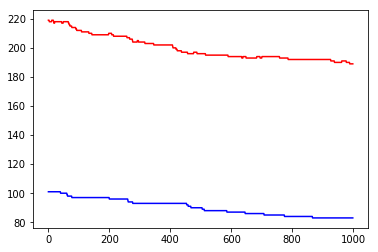

In [331]:
train_errors.append(error(w, train, target_train))
test_errors.append(error(w, TESTING[0][0:numTest], target_test))

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(num_epochs), train_errors, c='b')
plt.plot(range(num_epochs), test_errors, c='r')
plt.show()

In [277]:
a=np.array([[1,2],[4,3]])
b=np.argmax(a, axis=1)
b.reshape(-1,1)

array([[1],
       [0]])

# RICONOSCERE CIFRE
## dal 4  a tutte le cifre

In [291]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [306]:
def predict(w, X):
    return sigmoid(np.dot(X, w))

In [307]:
def predictHotClass(w, X):
    return np.argmax(predict(w, X), axis=1).reshape(-1,1)

In [323]:
numEx, numTest = 1000,1000
NumExampleTrain=len(TRAINING[0][0:numEx])
target_train = TRAINING[1][0:numEx]
NumExampleTest = len(TESTING[0][0:numTest])
target_test = TESTING[1][0:numTest]

targetForUpd=np.zeros((NumExampleTrain, 10), dtype=int)
for i in range(NumExampleTrain):
    targetForUpd[i,TRAINING[1][i]] = 1
        

In [339]:
w = 0.2*(np.random.rand(N_FEATURES, 10)-0.5)

In [340]:
def update(w, X, t):
    y = predict(w, X)
    delta = np.dot(X.T, y * (1-y) * (y-t))
    return -0.0001*delta

In [341]:
def error(w, X, t):
    errors = 0
    predictons = predictHotClass(w,X) #np.argmax(predict(w, X), axis=1).reshape(-1,1)
    for i in range(X.shape[0]):
        if predictons[i] != t[i]:
            errors+=1
    return errors

In [342]:
train=TRAINING[0][0:numEx]
test=TESTING[0][:numTest]
num_epochs = 2000
train_errors = []
test_errors = []

for e in range(num_epochs):
    w += update(w, train, targetForUpd)
    if e%100 == 0:
        print('t={},  err={}'.format(e, error(w, train, target_train)))
    train_errors.append(error(w, train, target_train))
    test_errors.append(error(w, TESTING[0][0:numTest], target_test))

t=0,  err=910
t=100,  err=329
t=200,  err=199
t=300,  err=170
t=400,  err=157
t=500,  err=148
t=600,  err=138
t=700,  err=131
t=800,  err=129
t=900,  err=120
t=1000,  err=115
t=1100,  err=107
t=1200,  err=104
t=1300,  err=102
t=1400,  err=100
t=1500,  err=95
t=1600,  err=92
t=1700,  err=92
t=1800,  err=90
t=1900,  err=90


In [346]:
TRAINING[1][25:35]

array([2, 4, 3, 2, 7, 3, 8, 6, 9, 0], dtype=uint8)

In [348]:
predictHotClass(w, train)[25:35].T

array([[2, 4, 3, 7, 7, 3, 8, 6, 7, 0]])

# AGGIUNGO UNO STRATO HIDDEN
## creo classe


In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [79]:
class NN:
    def __init__(self, neurons, training, testing):
        self.neurons=neurons
        self.training=training
        self.testing=testing
        self.Wh = (0.2*(np.random.rand(N_FEATURES, self.neurons)-0.5))
        self.Wo = (0.2*(np.random.rand(self.neurons, 10)-0.5))
        self.numEx, self.numTest = 60000,10000
        #self.numExampleTrain=len(self.training[0][0:numEx])
        self.target_train = self.training[1][0:self.numEx]
        self.target_test = self.testing[1][0:self.numTest]
        self.targetForUpd=np.zeros((self.numEx, 10), dtype=int)
        for i in range(self.numEx):
            self.targetForUpd[i,training[1][i]] = 1
        self.epoch = 0
        self.vh = 0 #np.zeros((N_FEATURES, self.neurons))
        self.vo = 0 #np.zeros((self.neurons, 10))
        
    def predict(self, X):
        outputs=[]
        H=sigmoid(np.dot(X, self.Wh))
        outputs.append(H)
        outputs.append(sigmoid(np.dot(H, self.Wo)))
        return outputs
    
    def predictHotClass(self, X):
        return np.argmax(self.predict(X)[-1], axis=1).reshape(-1,1)
    
    def accuracy(self, X, t):
        length = X.shape[0]
        correct = 0
        predictons = self.predictHotClass(X)

        for i in range(length):
            if predictons[i] == t[i]:
                correct+=1
        return np.round(correct/length*100, 2)
    
    def update(self, X, t):
        c = .5#*10**(-3)#+0.1/math.sqrt(self.epoch+1)

        hidden, y = self.predict(X)
        delta_y = y * (1-y) * (y-t) 
        #self.Wo -= c * np.dot(hidden.T, delta_y)
        
        delta_hidden = np.dot(delta_y, self.Wo.T) * (hidden * (1 - hidden)) 
        
        self.Wh -= c * np.dot(X.T, delta_hidden) 
        self.Wo -= c * np.dot(hidden.T, delta_y)
        
    def updateMomentum(self, X, t):
        learningRate = 1
        momentumUpdate = 0.9
        
        hidden, y = self.predict(X)
        
        delta_y = y * (1-y) * (y-t) 
        
        delta_hidden = np.dot(delta_y, self.Wo.T) * (hidden * (1 - hidden)) 
        
        delta_h = - learningRate * np.dot(X.T, delta_hidden)
        delta_o = - learningRate * np.dot(hidden.T, delta_y)
        #self.vh = momentumUpdate * self.vh + learningRate * np.dot(X.T, delta_hidden)
        #self.vo = momentumUpdate * self.vo + learningRate * np.dot(hidden.T, delta_y)
        #print(self.vh.tolist())
        self.Wh += delta_h   
        self.Wo += delta_o
       # self.Wh += momentumUpdate * self.vh
        #self.Wo += momentumUpdate * self.vo
        
        self.vh = delta_h
        self.vo = delta_o
        
        
        
    def ETAepoch(self,start_time):
        diff = dt.datetime.now() - self.start_time
        eta = divmod(diff.days * 86400 + diff.seconds, 60)
        if eta[0] != 0:
            ret = str(eta[0])+"m"
        else:
            ret = ""
        ret += str(eta[1])+"s"
        return ret
        
    def print_message_iter(self,iteration,accu_train,eta):
        len_eta = len(eta)
        space_fill = 6 - len_eta
        eta = "("+eta+")"
        for _ in range(space_fill):
            eta += " "
        message = 'Epoch '+str(self.epoch).zfill(3) + " "+eta+" "
        message += 'Accuracy: '+str(accu_train).zfill(4)+'%\t'
        #message += 'Accuracy TEST: '+str(accu_test).zfill(4)+'%\t'
        print(message)    
        
    def train(self):
        train=self.training[0][0:self.numEx]
        test=self.testing[0][0:self.numTest]
        num_epochs = 500
        train_errors = []
        test_errors = []
        
        self.start_time = dt.datetime.now()
        print(self.start_time)

        while self.epoch <= num_epochs:
            self.update(train, self.targetForUpd)
            self.epoch += 1
            #if self.epoch-1 % 5 == 0 or self.epoch == num_epochs:
            self.print_message_iter(self.epoch-1, self.accuracy(train, self.target_train) ,self.ETAepoch(self.start_time))
                #print('t={},  err={}'.format(self.epoch-1, self.accuracy(train, self.target_train)))
          #  train_errors.append(self.accuracy(train, self.target_train))
           # test_errors.append(self.accuracy(test, self.target_test))
            
        print("Accuracy on test:")    
        self.print_message_iter(self.epoch, self.accuracy(test, self.target_test) ,self.ETAepoch(self.start_time))

       
    
    

In [ ]:
nn = NN(neurons=150, training=TRAINING, testing=TESTING)
nn.train()

In [54]:
nn = NN(neurons=300, training=TRAINING, testing=TESTING)
nn.train()

2019-05-16 20:05:26.974023
Epoch 000 (3s)     Accuracy: 10.42%	
Epoch 010 (23s)    Accuracy: 10.22%	
Epoch 020 (44s)    Accuracy: 10.22%	
Epoch 030 (1m4s)   Accuracy: 22.83%	
Epoch 040 (1m26s)  Accuracy: 24.96%	
Epoch 050 (1m48s)  Accuracy: 30.56%	
Epoch 060 (2m8s)   Accuracy: 36.12%	
Epoch 070 (2m29s)  Accuracy: 40.17%	
Epoch 080 (2m51s)  Accuracy: 43.04%	
Epoch 090 (3m12s)  Accuracy: 45.28%	
Epoch 100 (3m33s)  Accuracy: 46.95%	
Epoch 110 (3m54s)  Accuracy: 48.3%	
Epoch 120 (4m13s)  Accuracy: 49.32%	
Epoch 130 (4m34s)  Accuracy: 50.18%	
Epoch 140 (4m56s)  Accuracy: 50.85%	
Epoch 150 (5m22s)  Accuracy: 51.48%	
Epoch 160 (5m45s)  Accuracy: 52.52%	
Epoch 170 (6m6s)   Accuracy: 61.33%	
Epoch 180 (6m25s)  Accuracy: 63.63%	
Epoch 190 (6m46s)  Accuracy: 65.12%	
Epoch 200 (7m5s)   Accuracy: 66.24%	
Epoch 210 (7m26s)  Accuracy: 67.21%	
Epoch 220 (7m46s)  Accuracy: 68.43%	
Epoch 230 (8m6s)   Accuracy: 72.19%	
Epoch 240 (8m26s)  Accuracy: 75.33%	
Epoch 250 (8m46s)  Accuracy: 77.38%	
Epoch 260 (9

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(num_epochs), train_errors, c='b')
plt.plot(range(num_epochs), test_errors, c='r')
plt.show()

NameError: name 'num_epochs' is not defined

In [17]:
#b=np.ones((1,N_FEATURES))

#self.training=np.vstack((TRAINING, b))

ValueError: could not broadcast input array from shape (60000,784) into shape (60000)

In [13]:
def reluNo(X, derivate = False):
    X_row = X.shape[0]
    X_column = X.shape[1]
    res = np.zeros((X_row, X_column))
    
    if not derivate:
        for row in range(X_row):
            for column in range (X_column):
                if X[row, column] > 0:
                    res[row,column] = X[row, column]
    else:
        for row in range(X_row):
            for column in range (X_column):
                if X[row, column] > 0:
                    res[row,column] = 1.
    
    return res

def ReLU (x, derivate = False):
    if not derivate:
        return x * (x > 0)
    else:
        return 1 * (x > 0)


#relu(np.random.random((3, 2))-0.5)
    

In [8]:
def ReLU (x, derivate = False):
    if not derivate:
        return x * (x > 0)
    else:
        return 1 * (x > 0)
    
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
class NN:
    def __init__(self, neurons, training, testing, lr, mu):
        self.neurons=neurons
        self.training=training
        self.testing=testing
        self.Wh = (0.2*(np.random.rand(N_FEATURES, self.neurons+1)-0.5))
        self.Wo = (0.2*(np.random.rand(self.neurons+1, 10)-0.5))
        self.numEx, self.numTest = 60000, 10000
        #self.numExampleTrain=len(self.training[0][0:numEx])
        self.target_train = self.training[1][0:self.numEx+1]
        self.target_test = self.testing[1][0:self.numTest+1]
        self.targetForUpd=np.zeros((self.numEx+1, 10), dtype=int)
        for i in range(self.numEx):
            self.targetForUpd[i,training[1][i]] = 1
        self.epoch = 0
        self.vh = 0 #np.zeros((N_FEATURES, self.neurons))
        self.vo = 0 #np.zeros((self.neurons, 10))
        self.lr = lr
        self.mu = mu
        
    def predict(self, X):
        outputs=[]
        H=ReLU(np.dot(X, self.Wh))
        outputs.append(H)
        outputs.append(sigmoid(np.dot(replaceWithOnes(H), self.Wo)))
        return outputs
    
    def replaceWithOnes (X, row = True):
        newX = X
        if row:
            return newX[:-1] = 1.
        else:
            return newX[:,-1:] = 1
            
    def predictHotClass(self, X):
        return np.argmax(self.predict(X)[-1], axis=1).reshape(-1,1)
    
    def accuracy(self, X, t):
        lengthX = X.shape[0]
        correct = 0
        predictons = self.predictHotClass(X)

        for i in range(lengthX-1):
            
            if predictons[i] == t[i]:
                
                correct+=1
        return np.round(correct/lengthX*100, 2)
    
    def update(self, X, t):
        c = .00001#*10**(-3)#+0.1/math.sqrt(self.epoch+1)
        
        hidden, y = self.predict(X)
        delta_y = y * (1-y) * (y-t) 
        #self.Wo -= c * np.dot(hidden.T, delta_y)
        
        delta_hidden = np.dot(delta_y, self.Wo.T) * (hidden * (1 - hidden)) 
        
        self.Wh -= c * np.dot(X.T, delta_hidden) 
        self.Wo -= c * np.dot(hidden.T, delta_y)
        
    def updateMomentum(self, X, t, learningRate, momentumUpdate):
        hidden, y = self.predict(X)        
        delta_y = y * (1-y) * (y-t)       
        delta_hidden = np.dot(delta_y, self.Wo.T) * ReLU(hidden, derivate=True)        
        delta_h = - learningRate * np.dot(X.T, delta_hidden)
        delta_o = - learningRate * np.dot(hidden.T, delta_y)
        self.Wh += delta_h + momentumUpdate * self.vh
        self.Wo += delta_o + momentumUpdate * self.vo        
        self.vh = delta_h
        self.vo = delta_o           
        
    def ETAepoch(self,start_time):
        diff = dt.datetime.now() - self.start_time
        eta = divmod(diff.days * 86400 + diff.seconds, 60)
        if eta[0] != 0:
            ret = str(eta[0])+"m"
        else:
            ret = ""
        ret += str(eta[1])+"s"
        return ret
        
    def print_message_iter(self,iteration,accu_train,eta):
        len_eta = len(eta)
        space_fill = 6 - len_eta
        eta = "("+eta+")"
        for _ in range(space_fill):
            eta += " "
        message = 'Epoch '+str(self.epoch).zfill(3) + " "+eta+" "
        message += 'Accuracy: '+str(accu_train).zfill(4)+'%\t'
        #message += 'Accuracy TEST: '+str(accu_test).zfill(4)+'%\t'
        print(message)    
        
    def train(self):
        train=self.training[0][0:self.numEx]
        b=np.ones((1,N_FEATURES))
        train=np.vstack((train, b))
        test=self.testing[0][0:self.numTest]
        num_epochs = 1300
        train_errors = []
        test_errors = []
        
        
        self.start_time = dt.datetime.now()
        print(self.start_time)
        print("learning rate= "+str(self.lr)+ " momentum update=" +str(self.mu))
            
        while self.epoch <= num_epochs:
            self.updateMomentum(train, self.targetForUpd, self.lr, self.mu)
            self.epoch += 1
            if self.epoch % 100 == 1 or self.epoch == num_epochs:
                self.print_message_iter(self.epoch, self.accuracy(train, self.target_train) ,self.ETAepoch(self.start_time))
                #print('t={},  err={}'.format(self.epoch-1, self.accuracy(train, self.target_train)))
            #train_errors.append(self.accuracy(train, self.target_train))
            #test_errors.append(self.accuracy(test, self.target_test))
            
        print("Accuracy on test:")    
        self.print_message_iter(self.epoch, self.accuracy(test, self.target_test) ,self.ETAepoch(self.start_time))

       
    
    

In [7]:
for lri in [2e-5, 3e-5, 1e-5, 0.5*1e-5, 1e-6, 0.5*1e-6]:
    for mui in [.5, .75, .9, .99]:
        nn = NN(neurons=150, training=TRAINING, testing=TESTING, lr=lri, mu=mui)
        nn.train()
        print("----------------------------------------------------------")

2019-05-18 11:21:14.554642
learning rate= 2e-05 momentum update=0.5
Epoch 001 (1s)     Accuracy: 20.5%	
Epoch 101 (1m36s)  Accuracy: 90.07%	
Epoch 201 (3m12s)  Accuracy: 92.26%	
Epoch 301 (4m47s)  Accuracy: 93.44%	
Epoch 401 (6m23s)  Accuracy: 94.19%	
Epoch 501 (7m59s)  Accuracy: 94.82%	
Epoch 601 (9m37s)  Accuracy: 95.27%	
Epoch 701 (11m13s) Accuracy: 95.66%	
Epoch 801 (12m49s) Accuracy: 95.98%	
Epoch 901 (14m25s) Accuracy: 96.24%	
Epoch 1000 (16m2s)  Accuracy: 96.49%	
Epoch 1001 (16m3s)  Accuracy: 96.49%	
Accuracy on test:
Epoch 1001 (16m3s)  Accuracy: 96.31%	
----------------------------------------------------------
2019-05-18 11:37:18.639953
learning rate= 2e-05 momentum update=0.75
Epoch 001 (1s)     Accuracy: 21.42%	
Epoch 101 (1m39s)  Accuracy: 90.45%	
Epoch 201 (3m15s)  Accuracy: 92.49%	
Epoch 301 (4m54s)  Accuracy: 93.62%	
Epoch 401 (6m30s)  Accuracy: 94.35%	
Epoch 501 (8m8s)   Accuracy: 94.97%	
Epoch 601 (9m43s)  Accuracy: 95.46%	
Epoch 701 (11m18s) Accuracy: 95.86%	
Epoch 8

Epoch 001 (1s)     Accuracy: 9.84%	
Epoch 101 (1m38s)  Accuracy: 84.15%	
Epoch 201 (3m21s)  Accuracy: 88.17%	
Epoch 301 (4m57s)  Accuracy: 89.62%	
Epoch 401 (6m35s)  Accuracy: 90.59%	
Epoch 501 (8m10s)  Accuracy: 91.28%	
Epoch 601 (9m48s)  Accuracy: 91.82%	
Epoch 701 (11m25s) Accuracy: 92.3%	
Epoch 801 (13m2s)  Accuracy: 92.68%	
Epoch 901 (14m39s) Accuracy: 93.04%	
Epoch 1000 (16m15s) Accuracy: 93.34%	
Epoch 1001 (16m17s) Accuracy: 93.34%	
Accuracy on test:
Epoch 1001 (16m17s) Accuracy: 93.42%	
----------------------------------------------------------
2019-05-18 15:11:26.060073
learning rate= 5e-06 momentum update=0.9
Epoch 001 (1s)     Accuracy: 14.02%	
Epoch 101 (1m37s)  Accuracy: 85.2%	
Epoch 201 (3m13s)  Accuracy: 88.57%	
Epoch 301 (4m49s)  Accuracy: 89.87%	
Epoch 401 (6m26s)  Accuracy: 90.79%	
Epoch 501 (8m1s)   Accuracy: 91.4%	
Epoch 601 (9m36s)  Accuracy: 91.97%	
Epoch 701 (11m12s) Accuracy: 92.42%	
Epoch 801 (12m48s) Accuracy: 92.78%	
Epoch 901 (14m24s) Accuracy: 93.11%	
Epoch

In [8]:
for lri, mui in [5e-5, 4e-5,, 3e-5, 2e-5, 1e-5, 0.5e-5, 1e-6, 0.5e-6], [0, .05, .75, .9, .99]:
        nn = NN(neurons=220, training=TRAINING, testing=TESTING, lr=lri, mu=mui)
        nn.train()
        print("----------------------------------------------------------")

SyntaxError: invalid syntax (<ipython-input-8-7319172ad905>, line 1)

In [16]:
for lri in [1e-5, 0.5*1e-5, 1e-6, 0.5*1e-6]:
    for mui in [.05, .75, .9, .99]:
        nn = NN(neurons=100, training=TRAINING, testing=TESTING, lr=lri, mu=mui)
        nn.train()
        print("----------------------------------------------------------")

2019-05-18 01:39:23.659353
learning rate= 1e-05 momentum update=0.05
Epoch 001 (7s)     Accuracy: 12.81%	
Epoch 101 (1m17s)  Accuracy: 84.87%	
Epoch 201 (2m23s)  Accuracy: 88.8%	
Epoch 301 (3m28s)  Accuracy: 90.12%	
Epoch 401 (4m34s)  Accuracy: 90.9%	
Epoch 501 (5m40s)  Accuracy: 91.54%	
Epoch 601 (6m45s)  Accuracy: 92.06%	
Epoch 701 (7m50s)  Accuracy: 92.48%	
Epoch 801 (8m56s)  Accuracy: 92.88%	
Epoch 901 (10m1s)  Accuracy: 93.19%	
Epoch 1000 (11m7s)  Accuracy: 93.48%	
Epoch 1001 (11m8s)  Accuracy: 93.48%	
Accuracy on test:
Epoch 1001 (11m11s) Accuracy: 93.8%	
----------------------------------------------------------
2019-05-18 01:50:35.606207
learning rate= 1e-05 momentum update=0.75
Epoch 001 (1s)     Accuracy: 13.86%	
Epoch 101 (1m6s)   Accuracy: 87.54%	
Epoch 201 (2m11s)  Accuracy: 90.23%	
Epoch 301 (3m16s)  Accuracy: 91.57%	
Epoch 401 (4m21s)  Accuracy: 92.37%	
Epoch 501 (5m26s)  Accuracy: 93.07%	
Epoch 601 (6m33s)  Accuracy: 93.54%	
Epoch 701 (7m40s)  Accuracy: 93.95%	
Epoch 80

Epoch 001 (1s)     Accuracy: 8.28%	
Epoch 101 (1m8s)   Accuracy: 35.52%	
Epoch 201 (2m16s)  Accuracy: 43.86%	
Epoch 301 (3m24s)  Accuracy: 54.29%	
Epoch 401 (4m32s)  Accuracy: 62.32%	
Epoch 501 (5m40s)  Accuracy: 67.78%	
Epoch 601 (6m49s)  Accuracy: 71.36%	
Epoch 701 (7m56s)  Accuracy: 74.85%	
Epoch 801 (9m5s)   Accuracy: 78.43%	
Epoch 901 (10m13s) Accuracy: 81.01%	
Epoch 1000 (11m20s) Accuracy: 82.72%	
Epoch 1001 (11m21s) Accuracy: 82.73%	
Accuracy on test:
Epoch 1001 (11m21s) Accuracy: 83.2%	
----------------------------------------------------------
2019-05-18 04:20:03.204822
learning rate= 5e-07 momentum update=0.9
Epoch 001 (1s)     Accuracy: 9.15%	
Epoch 101 (1m9s)   Accuracy: 38.72%	
Epoch 201 (2m17s)  Accuracy: 46.38%	
Epoch 301 (3m25s)  Accuracy: 59.73%	
Epoch 401 (4m32s)  Accuracy: 67.82%	
Epoch 501 (5m40s)  Accuracy: 71.52%	
Epoch 601 (6m48s)  Accuracy: 73.61%	
Epoch 701 (7m56s)  Accuracy: 75.65%	
Epoch 801 (9m4s)   Accuracy: 79.27%	
Epoch 901 (10m13s) Accuracy: 82.41%	
Epoc

In [48]:
nn.Wh.shape

(784, 301)

In [97]:
for lr in [.00001, .0001, .001, .01]:
            print(lr)

1e-05
0.0001
0.001
0.01


In [6]:
def rr(x):
    return x * (x > 0)

rr(np.random.random((3,2))-0.5)

array([[-0.        , -0.        ],
       [ 0.10042429, -0.        ],
       [ 0.40086741, -0.        ]])

In [4]:
TRAINING[0].shape

(60000, 784)

In [7]:
for i in range(10):
    print (i)

0
1
2
3
4
5
6
7
8
9


In [12]:
class NN:
    def __init__(self, neurons, training, testing, lr, mu):
        self.numEx, self.numTest = 60000, 10000
        self.neurons=neurons
        self.training=training
        self.testing=testing
        #initalizate He at al.
        #self.Wh = (0.2*(np.random.rand(N_FEATURES, self.neurons)-0.5))
        self.Wh = np.random.randn(N_FEATURES, self.neurons) * math.sqrt(2.0/self.numEx)
        #self.bh = (0.2*(np.random.rand(1, self.neurons)-0.5))
        self.bh = np.random.randn(1, self.neurons) * math.sqrt(2.0/self.numEx)
        #self.Wo = (0.2*(np.random.rand(self.neurons, 10)-0.5))
        self.Wo = np.random.randn(self.neurons, 10) * math.sqrt(2.0/self.numEx)
        #self.bo = (0.2*(np.random.rand(1, 10)-0.5))
        self.bo = np.random.randn(1, 10) * math.sqrt(2.0/self.numEx)
        
        #self.numExampleTrain=len(self.training[0][0:numEx])
        self.target_train = self.training[1][0:self.numEx]
        self.target_test = self.testing[1][0:self.numTest]
        self.targetForUpd=np.zeros((self.numEx, 10), dtype=int)
        for i in range(self.numEx):
            self.targetForUpd[i,training[1][i]] = 1
        self.epoch = 0
        self.vh = 0
        self.vo = 0 
        self.vbh = 0
        self.vbo = 0
        self.lr = lr
        self.mu = mu
        
    def predict(self, X):
        outputs=[]
        H=ReLU(np.dot(X, self.Wh)+self.bh)
        outputs.append(H)
        outputs.append(sigmoid((np.dot(H, self.Wo))+self.bo))
        return outputs
        
    def predictHotClass(self, X):
        return np.argmax(self.predict(X)[-1], axis=1).reshape(-1,1)
    
    def accuracy(self, X, t):
        lengthX = X.shape[0]
        correct = 0
        predictons = self.predictHotClass(X)
        for i in range(lengthX): 
            if predictons[i] == t[i]:     
                correct+=1
        return np.round(correct/lengthX*100, 2)
        
    def updateMomentum(self, X, t, learningRate, momentumUpdate):
        hidden, y = self.predict(X)        
        delta_y = y * (1-y) * (y-t)       
        delta_hidden = np.dot(delta_y, self.Wo.T) * ReLU(hidden, derivate=True)        
        delta_h = - learningRate * np.dot(X.T, delta_hidden)
        delta_o = - learningRate * np.dot(hidden.T, delta_y)
        delta_bo = - learningRate * np.sum(delta_y, axis=0, keepdims=True)
        delta_bh = - learningRate * np.sum(delta_hidden, axis=0, keepdims=True)
        
        self.Wh += delta_h + momentumUpdate * self.vh
        self.bh += delta_bh + momentumUpdate * self.vbh
        self.Wo += delta_o + momentumUpdate * self.vo  
        self.bo += delta_bo + momentumUpdate * self.vbo
       
        self.vh = delta_h
        self.vbh = delta_bh
        self.vo = delta_o  
        self.vbo = delta_bo
        
        
    def ETAepoch(self,start_time):
        diff = dt.datetime.now() - self.start_time
        eta = divmod(diff.days * 86400 + diff.seconds, 60)
        if eta[0] != 0:
            ret = str(eta[0])+"m"
        else:
            ret = ""
        ret += str(eta[1])+"s"
        return ret
        
    def print_message_iter(self,iteration,accu_train,eta):
        len_eta = len(eta)
        space_fill = 6 - len_eta
        eta = "("+eta+")"
        for _ in range(space_fill):
            eta += " "
        message = 'Epoch '+str(self.epoch).zfill(3) + " "+eta+" "
        message += 'Accuracy: '+str(accu_train).zfill(4)+'%\t'
        #message += 'Accuracy TEST: '+str(accu_test).zfill(4)+'%\t'
        return message
        
    def train(self):
        train=self.training[0][0:self.numEx]
        test=self.testing[0][0:self.numTest]
        num_epochs = 1500
       
        
        self.start_time = dt.datetime.now()
        print(self.start_time)
        logger.info("learning rate= "+str(self.lr)+ " momentum update=" +str(self.mu))
            
        while self.epoch <= num_epochs:
            self.updateMomentum(train, self.targetForUpd, self.lr, self.mu)
            
            if self.epoch % 100 == 0:
                print(self.print_message_iter(self.epoch, self.accuracy(train, self.target_train) ,self.ETAepoch(self.start_time)))
            
            if self.epoch % 10 == 0:
                logger.debug(self.print_message_iter(self.epoch, self.accuracy(train, self.target_train) ,self.ETAepoch(self.start_time)))
            
            self.epoch += 1  
                     
        print("Accuracy on test:")    
        (self.print_message_iter(self.epoch, self.accuracy(test, self.target_test) ,self.ETAepoch(self.start_time)))
        
    def getWeigth(self):
        return self.Wh, self.Wo
       
    
    

In [13]:
nn = NN(neurons=100, training=TRAINING, testing=TESTING, lr=3e-5, mu=.99)
nn.train()


2019-05-20 11:45:15.507355
Epoch 000 (1s)     Accuracy: 12.07%	
Epoch 100 (1m13s)  Accuracy: 70.75%	
Epoch 200 (2m32s)  Accuracy: 83.69%	
Epoch 300 (3m46s)  Accuracy: 85.01%	
Epoch 400 (5m4s)   Accuracy: 93.83%	
Epoch 500 (6m19s)  Accuracy: 95.21%	
Epoch 600 (7m34s)  Accuracy: 95.8%	
Epoch 700 (8m48s)  Accuracy: 96.24%	
Epoch 800 (10m2s)  Accuracy: 96.61%	
Epoch 900 (11m17s) Accuracy: 96.93%	
Epoch 1000 (12m30s) Accuracy: 97.16%	
Epoch 1100 (13m45s) Accuracy: 97.34%	
Epoch 1200 (15m3s)  Accuracy: 97.56%	
Epoch 1300 (16m16s) Accuracy: 97.69%	
Epoch 1400 (17m28s) Accuracy: 97.84%	
Epoch 1500 (18m42s) Accuracy: 97.95%	
Accuracy on test:


In [14]:
logger.debug("ciao")

In [14]:
for lri in [2e-5, 3e-5, 1e-5, 0.5*1e-5, 1e-6, 0.5*1e-6]:
    for mui in [.5, .75, .9, .99]:
        nn = NN(neurons=150, training=TRAINING, testing=TESTING, lr=lri, mu=mui)
        nn.train()
        print("----------------------------------------------------------")

2019-05-19 20:52:27.617854
learning rate= 2e-05 momentum update=0.5
Epoch 000 (1s)     Accuracy: 19.1%	


KeyboardInterrupt: 

In [20]:
nn = NN(neurons=200, training=TRAINING, testing=TESTING, lr=3e-5, mu=.99)
nn.train()

2019-05-18 23:20:03.086013
learning rate= 3e-05 momentum update=0.99
Epoch 001 (2s)     Accuracy: 20.56%	
Epoch 101 (2m9s)   Accuracy: 84.17%	
Epoch 201 (4m20s)  Accuracy: 92.76%	
Epoch 301 (6m30s)  Accuracy: 94.5%	
Epoch 401 (8m39s)  Accuracy: 95.49%	
Epoch 501 (10m52s) Accuracy: 96.18%	
Epoch 601 (13m3s)  Accuracy: 96.66%	
Epoch 701 (15m13s) Accuracy: 97.08%	
Epoch 801 (17m22s) Accuracy: 97.38%	
Epoch 901 (19m36s) Accuracy: 97.58%	
Epoch 1001 (21m48s) Accuracy: 97.79%	
Epoch 1101 (23m59s) Accuracy: 97.95%	
Epoch 1201 (26m12s) Accuracy: 98.11%	
Epoch 1301 (28m24s) Accuracy: 98.23%	


KeyboardInterrupt: 

In [25]:
for n in [220, 250, 300]:
    print("neurons: "+str(n))
    nn = NN(neurons=n, training=TRAINING, testing=TESTING, lr=3e-5, mu=.99)
    nn.train()
    print("----------------------------------------------------------")

neurons: 220
2019-05-19 00:13:49.227198
Epoch 000 (2s)     Accuracy: 16.85%	
Epoch 100 (2m18s)  Accuracy: 9.75%	
Epoch 200 (4m41s)  Accuracy: 74.91%	
Epoch 300 (7m2s)   Accuracy: 83.98%	
Epoch 400 (9m24s)  Accuracy: 85.47%	
Epoch 500 (11m42s) Accuracy: 86.33%	
Epoch 600 (14m2s)  Accuracy: 86.9%	
Epoch 700 (16m22s) Accuracy: 87.32%	
Epoch 800 (18m42s) Accuracy: 87.64%	
Epoch 900 (21m1s)  Accuracy: 87.89%	
Epoch 1000 (23m20s) Accuracy: 88.1%	
Epoch 1100 (25m38s) Accuracy: 89.03%	
Epoch 1200 (27m58s) Accuracy: 97.93%	
Accuracy on test:
Epoch 1201 (27m58s) Accuracy: 97.22%	
----------------------------------------------------------
neurons: 250
2019-05-19 00:41:48.096022
Epoch 000 (2s)     Accuracy: 10.48%	
Epoch 100 (2m38s)  Accuracy: 9.88%	
Epoch 200 (5m14s)  Accuracy: 9.88%	
Epoch 300 (7m50s)  Accuracy: 9.88%	
Epoch 400 (10m26s) Accuracy: 9.88%	
Epoch 500 (13m3s)  Accuracy: 12.18%	
Epoch 600 (15m45s) Accuracy: 20.84%	


KeyboardInterrupt: 

In [ ]:
 for n in [100, 200, 220]:   
    for lri in [2e-5, 3e-5, 1e-5, 0.5*1e-5, 1e-6, 0.5*1e-6]:
        for mui in [.5, .75, .9, .99]:
            print("neurons: "+str(n))
            nn = NN(neurons=n, training=TRAINING, testing=TESTING, lr=lri, mu=mui)
            nn.train()
            print("----------------------------------------------------------")

neurons: 100
2019-05-19 01:01:32.331447
learning rate= 2e-05 momentum update=0.5
Epoch 000 (1s)     Accuracy: 11.86%	
Epoch 100 (1m7s)   Accuracy: 89.77%	
Epoch 200 (2m14s)  Accuracy: 91.88%	
Epoch 300 (3m21s)  Accuracy: 93.03%	
Epoch 400 (4m27s)  Accuracy: 93.89%	
Epoch 500 (5m35s)  Accuracy: 94.44%	
Epoch 600 (6m44s)  Accuracy: 94.92%	
Epoch 700 (7m51s)  Accuracy: 95.36%	
Epoch 800 (8m57s)  Accuracy: 95.71%	
Epoch 900 (10m4s)  Accuracy: 95.95%	
Epoch 1000 (11m11s) Accuracy: 96.17%	
Epoch 1100 (12m19s) Accuracy: 96.39%	
Epoch 1200 (13m26s) Accuracy: 96.6%	
Epoch 1300 (14m34s) Accuracy: 96.79%	
Epoch 1400 (15m41s) Accuracy: 96.94%	
Epoch 1500 (16m49s) Accuracy: 97.09%	
Accuracy on test:
Epoch 1501 (16m49s) Accuracy: 96.58%	
----------------------------------------------------------
neurons: 100
2019-05-19 01:18:22.306137
learning rate= 2e-05 momentum update=0.75
Epoch 000 (1s)     Accuracy: 22.48%	
Epoch 100 (1m7s)   Accuracy: 90.36%	
Epoch 200 (2m16s)  Accuracy: 92.48%	
Epoch 300 (3m2

Epoch 500 (5m49s)  Accuracy: 93.12%	
Epoch 600 (6m58s)  Accuracy: 93.64%	
Epoch 700 (8m7s)   Accuracy: 94.07%	
Epoch 800 (9m17s)  Accuracy: 94.44%	
Epoch 900 (10m26s) Accuracy: 94.72%	
Epoch 1000 (11m35s) Accuracy: 94.96%	
Epoch 1100 (12m45s) Accuracy: 95.2%	
Epoch 1200 (14m2s)  Accuracy: 95.39%	
Epoch 1300 (15m12s) Accuracy: 95.56%	
Epoch 1400 (16m21s) Accuracy: 95.77%	
Epoch 1500 (17m30s) Accuracy: 95.96%	
Accuracy on test:
Epoch 1501 (17m30s) Accuracy: 95.54%	
----------------------------------------------------------
neurons: 100
2019-05-19 04:11:23.952595
learning rate= 1e-05 momentum update=0.99
Epoch 000 (1s)     Accuracy: 12.96%	
Epoch 100 (1m10s)  Accuracy: 87.98%	
Epoch 200 (2m20s)  Accuracy: 90.57%	
Epoch 300 (3m29s)  Accuracy: 91.74%	
Epoch 400 (4m38s)  Accuracy: 92.55%	
Epoch 500 (5m47s)  Accuracy: 93.23%	
Epoch 600 (6m57s)  Accuracy: 93.82%	
Epoch 700 (8m6s)   Accuracy: 94.22%	
Epoch 800 (9m16s)  Accuracy: 94.56%	
Epoch 900 (10m25s) Accuracy: 94.89%	
Epoch 1000 (11m35s) A

Epoch 1300 (15m8s)  Accuracy: 84.56%	
Epoch 1400 (16m17s) Accuracy: 85.2%	
Epoch 1500 (17m26s) Accuracy: 85.69%	
Accuracy on test:
Epoch 1501 (17m26s) Accuracy: 86.56%	
----------------------------------------------------------
neurons: 100
2019-05-19 07:05:47.366858
learning rate= 5e-07 momentum update=0.75
Epoch 000 (1s)     Accuracy: 7.96%	
Epoch 100 (1m10s)  Accuracy: 43.22%	
Epoch 200 (2m22s)  Accuracy: 47.97%	
Epoch 300 (3m31s)  Accuracy: 56.98%	
Epoch 400 (4m40s)  Accuracy: 62.58%	
Epoch 500 (5m49s)  Accuracy: 68.84%	
Epoch 600 (6m58s)  Accuracy: 74.73%	
Epoch 700 (8m8s)   Accuracy: 78.71%	
Epoch 800 (9m18s)  Accuracy: 81.25%	
Epoch 900 (10m26s) Accuracy: 82.77%	
Epoch 1000 (11m37s) Accuracy: 83.88%	
Epoch 1100 (12m46s) Accuracy: 84.7%	
Epoch 1200 (13m56s) Accuracy: 85.36%	
Epoch 1300 (15m5s)  Accuracy: 85.87%	
Epoch 1400 (16m14s) Accuracy: 86.3%	
Epoch 1500 (17m23s) Accuracy: 86.72%	
Accuracy on test:
Epoch 1501 (17m23s) Accuracy: 87.29%	
---------------------------------------

Epoch 000 (2s)     Accuracy: 21.77%	
Epoch 100 (2m16s)  Accuracy: 10.61%	
Epoch 200 (4m32s)  Accuracy: 9.99%	
Epoch 300 (6m46s)  Accuracy: 9.92%	
Epoch 400 (9m1s)   Accuracy: 9.92%	
Epoch 500 (11m16s) Accuracy: 9.75%	
Epoch 600 (13m32s) Accuracy: 9.75%	
Epoch 700 (15m47s) Accuracy: 9.75%	
Epoch 800 (18m2s)  Accuracy: 9.75%	
Epoch 900 (20m16s) Accuracy: 9.75%	
Epoch 1000 (22m31s) Accuracy: 9.75%	
Epoch 1100 (24m44s) Accuracy: 12.17%	
Epoch 1200 (26m58s) Accuracy: 9.04%	
Epoch 1300 (29m13s) Accuracy: 9.75%	
Epoch 1400 (31m28s) Accuracy: 9.75%	
Epoch 1500 (33m43s) Accuracy: 9.75%	
Accuracy on test:
Epoch 1501 (33m44s) Accuracy: 9.74%	
----------------------------------------------------------
neurons: 200
2019-05-19 12:28:27.886481
learning rate= 1e-05 momentum update=0.5
Epoch 000 (2s)     Accuracy: 20.32%	
Epoch 100 (2m16s)  Accuracy: 87.9%	
Epoch 200 (4m30s)  Accuracy: 90.23%	
Epoch 300 (6m44s)  Accuracy: 91.48%	
Epoch 400 (9m0s)   Accuracy: 92.32%	
Epoch 500 (11m14s) Accuracy: 92.98%	

In [9]:
nn = NN(neurons=200, training=TRAINING, testing=TESTING, lr=1e-5, mu=.99)
nn.train()


2019-05-19 13:43:58.549532
learning rate= 1e-05 momentum update=0.99
Epoch 000 (2s)     Accuracy: 15.9%	
Epoch 100 (3m32s)  Accuracy: 88.94%	
Epoch 200 (7m5s)   Accuracy: 91.18%	
Epoch 300 (10m37s) Accuracy: 92.32%	
Epoch 400 (14m10s) Accuracy: 93.13%	
Epoch 500 (17m44s) Accuracy: 93.76%	
Epoch 600 (21m18s) Accuracy: 94.24%	
Epoch 700 (24m53s) Accuracy: 94.66%	
Epoch 800 (28m26s) Accuracy: 95.04%	
Epoch 900 (32m0s)  Accuracy: 95.33%	
Epoch 1000 (35m34s) Accuracy: 95.62%	
Epoch 1100 (39m8s)  Accuracy: 95.84%	
Epoch 1200 (42m49s) Accuracy: 96.06%	
Epoch 1300 (46m27s) Accuracy: 96.28%	
Epoch 1400 (50m2s)  Accuracy: 96.45%	
Epoch 1500 (53m39s) Accuracy: 96.64%	
Accuracy on test:
Epoch 1501 (53m40s) Accuracy: 96.18%	


In [ ]:
import logging

logging.basicConfig(level format = '%(asctime)s  %(levelname)-10s %(processName)s  %(name)s %(message)s')

logging.debug("debug") 
logging.info("info") 
logging.warning("warning") 
logging.error("error")
logging.critical("critical")

In [15]:
import logging
logger = logging.getLogger(__name__)

hDebug = logging.FileHandler('log/DEBUG.log')
hInfo = logging.FileHandler('log/INFO.log')
hInfo.setLevel(logging.INFO)
hDebug.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
hInfo.setFormatter(formatter)
hDebug.setFormatter(formatter)

logger.addHandler(hInfo)
logger.addHandler(hDebug)


logger.debug('no')
logger.info('info')
logger.critical('cri')


In [17]:
logger.info('ciao')

In [55]:
import logging

logging.basicConfig(format='%(process)d-%(levelname)s-%(message)s')

logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [19]:
a=np.array([0,1,2,3,4,5])
a[0:2]

array([0, 1])